# Homework 6


This homework is designed to process a large csv file (bigger than pandas can handle)
https://github.com/msaricaumbc/DS_data/blob/master/bigfile.csv.zip?raw=true

Write code to perform/answer the following actions:

1. Print how many records processed
1. Create a histogram of ages
1. List the top 20 occupations 

Don't use Pandas or Dask

In [1]:
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import csv

In [2]:
from urllib import request

def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())

In [3]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 

In [4]:
file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/bigfile.csv.zip?raw=true'
file_name = 'bigfile.csv.zip'
download_file(file_name, file_url)

In [5]:
unzip(file_name)

File Name                                             Modified             Size
bigfile.csv                                    2022-03-07 20:08:48  18034182194
Extracting all the files now...
Done!


In [6]:
fname = open('bigfile.csv', 'r')

In [7]:
age = []
occupation = []
csvreader = csv.reader(fname)
#for data in csvreader:
for index, data in enumerate(csvreader):
    #print(data)
    age.append(data[3])    
    occupation.append(data[4])
    

In [8]:
Age = pd.DataFrame(age, columns =['age'])
Occupation = pd.DataFrame(occupation, columns =['occupation'])

### 1. Print how many records processed

In [9]:
#Age.shape
Occupation.shape

(600000, 1)

### 2. Create a histogram of ages

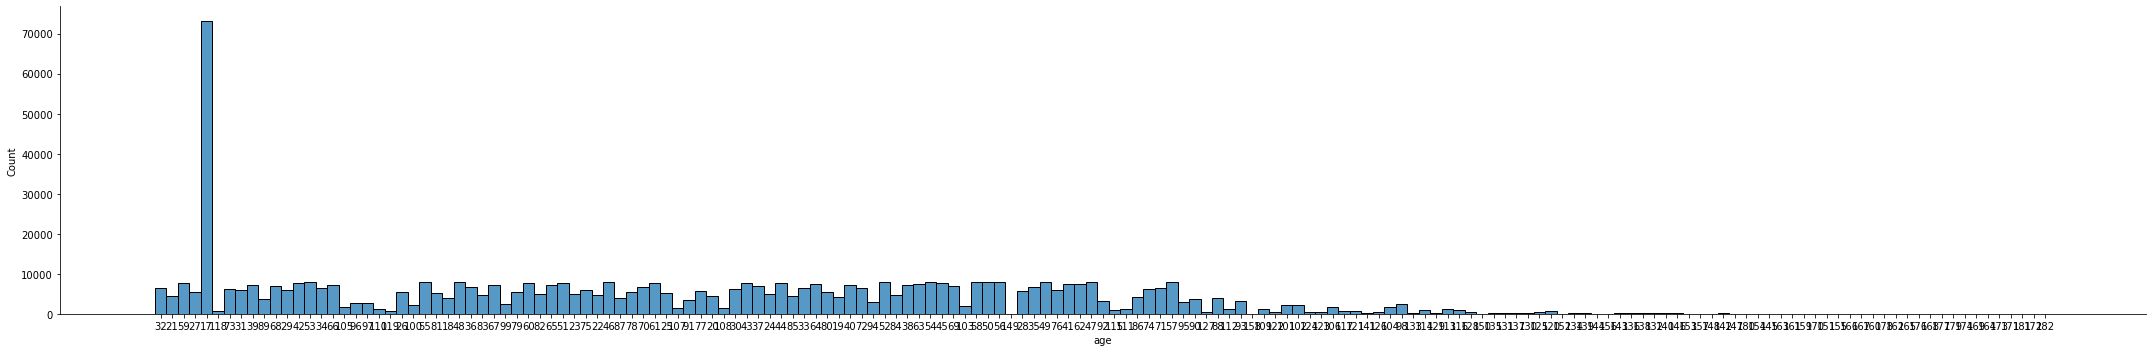

In [10]:
plot = sns.displot(Age, x = 'age', aspect = 6)

### 3. List the top 20 occupations

In [11]:
top_20 = Occupation['occupation'].value_counts()[0:20].index

In [12]:
Occupation['occupation'].value_counts()

Scientist- product/process development    1064
Psychiatric nurse                         1037
Therapist- sports                         1030
Toxicologist                              1024
Social researcher                         1021
                                          ... 
Designer- industrial/product               864
Health physicist                           864
Equities trader                            862
Operational researcher                     860
Barrister's clerk                          835
Name: occupation, Length: 639, dtype: int64

In [13]:
top_20

Index(['Scientist- product/process development', 'Psychiatric nurse',
       'Therapist- sports', 'Toxicologist', 'Social researcher',
       'Environmental health practitioner', 'Naval architect',
       'Teacher- primary school',
       'Administrator- charities/voluntary organisations',
       'Chartered loss adjuster', 'Field trials officer', 'Photographer',
       'Radio producer', 'Radiographer- diagnostic', 'Ranger/warden',
       'Electrical engineer', 'Administrator- education', 'Acupuncturist',
       'Quantity surveyor', 'Research scientist (medical)'],
      dtype='object')